<img src="images/bannerlandbouw.png" alt="Banner" width="400"/>

<div>
    <font color=#690027 markdown="1">
            <h1>WANNEER VERLOOPT HET DETECTEREN VAN OBJECTEN MINDER VLOT?</h1> 
    </font>
</div>

<div class="alert alert-box alert-success">
Om voorwerpen op een afbeelding te kunnen herkennen wordt een algoritme gebruikt. In deze notebook maak je gebruik van YOLO: <em>You only look once</em>, een realtime objectdetectiealgoritme. 
</div>

### Nodige modules installeren en inladen

Bij het begin van de notebook moeten eerst de nodige modules (bibliotheken) geïnstalleerd worden die gebruikt zullen worden in de code. 

Run de cel hieronder om de bibliotheek `opencv` te installeren; dit is een belangrijke bibliotheek binnen de beeldverwerking. 

In [1]:
!pip install opencv-python

In [2]:
#inladen nodige bibliotheken
import cv2
import numpy as np
from matplotlib import pyplot as plt

<div style='color: #690027;' markdown="1">
<h2>2. Detecteren van Afbeeldingen</h2>
</div>

<div class="alert alert-box alert-info">
Een objectdetectiealgoritme wordt ontwikkeld a.d.h.v. gelabelde voorbeelden, door verschillende foto's van verschillende objecten in het algoritme in te voeren en deze te benoemen. 
</div>

Zo worden bv. duizenden fotos van honden genomen en worden die telkens in het algoritme ingevoerd met de boodschap 'dit is een hond'. Het algoritme wordt zo 'getraind' op basis van veel foto's. Als er genoeg foto's aan het algoritme gegeven worden, zal het systeem zelfstandig honden op foto's kunnen herkennen, dus zonder dat de mens dit aan het algoritme moet vertellen, en het systeem zal dit doen met een bepaalde zekerheid. <br>
YOLO is een getraind algoritme waarin al heel wat voorwerpen inzitten die gedetecteerd en geïdentificeerd kunnen worden. In deze notebook ga je na hoe het algoritme dingen zal herkennen en waar het op vast loopt. [1]

<div style='color: #690027;' markdown="1">
<h3>2.1 Hoe werkt YOLO?</h3>
</div>

Om het algoritme te bespreken, moet je eerst weten wat je wil bereiken. Je wil rond een object een *selectiekader* plaatsen dat de locatie van het object weergeeft en je wil de klasse van het object bepalen. 

Elk selectiekader (met klasse) kan worden beschreven a.d.h.v. vier eigenschappen:
<ul>
    <li> middelpunt</li>
    <li> breedte</li>
    <li> hoogte</li>
    <li> waarde c komt overeen met een klasse van een object (bv. auto, verkeerslichten, enz.)</li>
</ul>

Daarnaast moeten we de P(c-waarde) voorspellen, dit is de zekerheid dat er een object in het selectiekader zit. 

Een afbeelding wordt opgesplitst in verschillende cellen, meestal met behulp van een 19 × 19-raster. Elke cel is verantwoordelijk voor het voorspellen van 5 selectievakken (voor het geval er meer dan één object in deze cel is). Dit wil dus zeggen dat er 1805 selectievakken in totaal zijn (19×19×5). Dit process wordt drie keer in verschillende delen van het detecteren toegepast.
<figure>
  <img src="images/yolo1.jpg" alt="Trulli" width="500">
  <center><figcaption>19 × 19-raster</figcaption></center>
</figure>

De meeste van deze selectievakken zullen geen objecten bevatten. Om deze te elimeren wordt de P(c)-waarde berekend. Aan de hand van deze waarde zullen selectievakken met lage objectwaarschijnlijkheid en/of grootste gemeenschappelijke oppervlakte verwijderd worden. Dit proces noemt <em>non-max suppression</em>.</p>
<figure>
  <img src="images/yolo.jpg" alt="Trulli" width="500">    
  <center><figcaption>Non-max suppression</figcaption></center>
</figure>

Zo blijft er één selectiekader over dat het object aanduidt en de klasse van het object weergeeft.

<div class="alert alert-block alert-warning">
We maken opnieuw gebruik van dezelfde functie om foto's weer te geven als in de vorige notebook.
</div>

<p>Hieronder wordt een afbeelding van een kat weergegeven. </p>

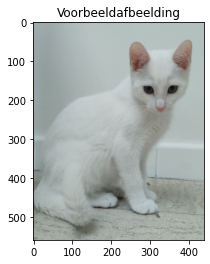

In [5]:
# functie geeft afbeelding weer
def plt_imshow(title, image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()
    
kat = cv2.imread("images/kat.jpg") # pas afbeelding aan naar afbeelding die je wilt bekijken
plt_imshow("Voorbeeldafbeelding", kat)

Voer het YOLO-algoritme uit op de afbeelding door de volgende code-cel uit te voeren:

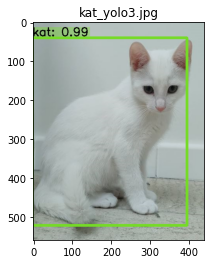

In [23]:
%run -i detect.py images/kat.jpg
# run afbeelding hondkat.png door algoritme, algoritme zal voorwerpen op afbeelding herkennen 

Je ziet dat de kat herkend wordt, er wordt daarna een selectiekader rond de kat getekend. Het getal dat erbij staat geeft de zekerheid weer waarmee het algoritme beslist dat de afbeelding een kat is, in dit geval is het algoritme dus 99 % zeker.

Het Yolo algroitme kan dus reeds honden en katten detecteren. Bekijk de afbeeldingen `hondkat.png` en `hondcake.jpg` met behulp van de functie om afbeeldingen weer te geven.

In [ ]:
# hier code schrijven


Stuur nu de afbeelding door het YOLO-algoritme:

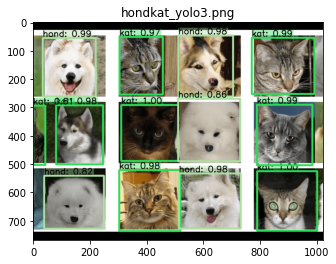

In [25]:
%run -i detect.py images/hondkat.png 
# run afbeelding hondkat.png door algoritme, het algoritme zal voorwerpen op afbeelding herkennen 

<p>Hoeveel dieren werden er juist gedetecteerd?</p>

Antwoord: 



<p>Werd er een dier fout gedetecteerd? Indien ja, hoe komt dit denk je?</p>

Antwoord: 



Probeer nu het algoritme met de afbeelding `hondcake.jpg`.

In [ ]:
#Schrijf zelf de code voor de afbeelding hondcake.jpg


<p>Hoeveel voorwerpen zijn er hier juist gedetecteerd?</p>

Antwoord: 



<p>Hoe komt dit denk je?</p>

Antwoord: 


<div style='color: #690027;' markdown="1">
<h2>3. Uitleg</h2>
</div>

<p>Een algoritme wordt getrained met behulp van een zelfgecreerde datatset. Dit wil zeggen je gaat zelf fotos in het algoritme gaat steken en gaat zeggen wat het voorwerp is. Bijvoorbeeld als je een tomaat wilt herkennen dan ga je zelf heel wat fotos van tomaten nemen en dit in het algoritme steken met het label tomaat eraan. Het algoritme gaat dan zelf kenmerken zoeken die op elke foto voorkomen, bijvoorbeeld dat de tomaat rond is. Als je een dataset hebt waar de voorwerpen dan sterk op elkaar lijken zoals hierboven dan kan het zijn dat het algoritme fouten maakt.</p>

<p>Op basis van de output die je hierboven kreeg. Welke kenmerken denk jij dat het algoritme bij hond zou hebben geplaatst?</p>

Voorwerpen die heel hard op elkaar lijken is een probleem waar zelf de beste machine learning algoritmes nog op vast lopen. Dit toont dan ook het nut aan van een uitgebreide en gevarieerde dataset. Nog een aantal voorbeelden van datasets waar veel algoritmes op vast lopen zijn: 
<table><tr>
<td><figure>
  <img src="images/hondkip.jpg" alt="Trulli" width="200">
    <figcaption><center>Hond of crispy chicken</center></figcaption>
</figure></td>
<td><figure>
  <img src="images/hondmop.jpg" alt="Trulli" width="200">
    <figcaption><center>Hond of mop</center></figcaption>
</figure></td>
<td><figure>
  <img src="images/slotchocloladeKoek.jpg" alt="Trulli" width="200">
    <figcaption><center>Chocoladekoek of luiaard</center></figcaption>
</figure></td>
<td><figure>
  <img src="images/corgibrood.png" alt="Trulli" width="200">
    <figcaption><center>Corgi of brood</center></figcaption>
</figure> </td>
</tr></table>

<p>Omdat de objecten op deze figuren zo op elkaar gelijken, heeft het menselijk oog soms al problemen om de getoonde objecten van elkaar te onderscheiden. Om deze dan te gaan detecteren met een algoritme is dit nog veel moeilijker, mede omdat de computer de afbeeldingen niet in zijn geheel bekijkt zoals wij wel doen. </p>

### Referenties
[1] Chablani, M. (2019, 1 juli). YOLO — You only look once, real time object detection explained. Medium. Geraadpleegd op 1 december 2021, van https://towardsdatascience.com/yolo-you-only-look-once-real-time-object-detection-explained-492dc9230006
<br>
[2] ŚWieżewski, J., PhD. (2022, 17 maart). Introduction to YOLO Algorithm and YOLO Object Detection. Appsilon | Enterprise R Shiny Dashboards. Geraadpleegd op 20 maart 2022, van https://appsilon.com/object-detection-yolo-algorithm/


<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>
Notebook AI in de Landbouw, zie <a href="http://www.aiopschool.be">AI Op School</a>, van M. Benoit, F. wyffels & N. Gesquière is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 